## Business Scenario
    A wholesale distributor supplies products to different types of clients such as:
    Retail stores
    Cafés
    Hotels
    Restaurants
    Currently, all customers are treated the same, which leads to:
    Inefficient inventory planning
    Poor marketing strategies
    Missed upselling opportunities
    The company wants to group customers based on their purchasing behavior to improve decision-making.
    
-------------------------------------------
### 🔹 Task 1: Data Exploration
    Load the dataset and inspect all available features.
    Identify which columns represent customer purchasing behavior.
    Remove or ignore columns that are not directly related to spending patterns.
### 🔹 Task 2: Feature Selection
    Select suitable numerical features that can represent customer buying habits.
    Justify your feature selection briefly.
### 🔹 Task 3: Data Preparation
    Prepare the selected data so that distance-based grouping works correctly.
    Verify that all features contribute fairly to distance calculation.
### 🔹 Task 4: Clustering Model Construction
    Build a clustering model to group customers into K segments.
    Experiment with multiple values of K.
### 🔹 Task 5: Optimal Cluster Identification
    Identify a suitable number of customer groups using an appropriate approach.
    Explain why this value of K is reasonable.
### 🔹 Task 6: Cluster Assignment
    Assign each customer to a cluster.
    Add the cluster label to the dataset.
### 🔹 Task 7: Cluster Visualization
    Visualize customer clusters using two important spending categories.
    Mark cluster centers clearly in the visualization.
### 🔹 Task 8: Cluster Profiling
    For each cluster:
    Calculate average spending per category
    Identify dominant purchase patterns
    Summarize each cluster in business-friendly language.
### 🔹 Task 9: Business Insight Generation
    Propose one business strategy for each customer segment, such as:
    Targeted promotions
    Inventory prioritization
    Personalized pricing strategies
### 🔹 Task 10: Stability & Limitations
    Rerun clustering with a different random state.
    Observe whether cluster assignments change.
    Mention one limitation of this clustering approach.

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 🔹 Task 1 — Data Exploration

In [49]:
df = pd.read_csv(r'C:\Users\KIRAN\OneDrive\Desktop\CSV Files\Wholesale customers data.csv')

In [50]:
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [52]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

## outlier Detection

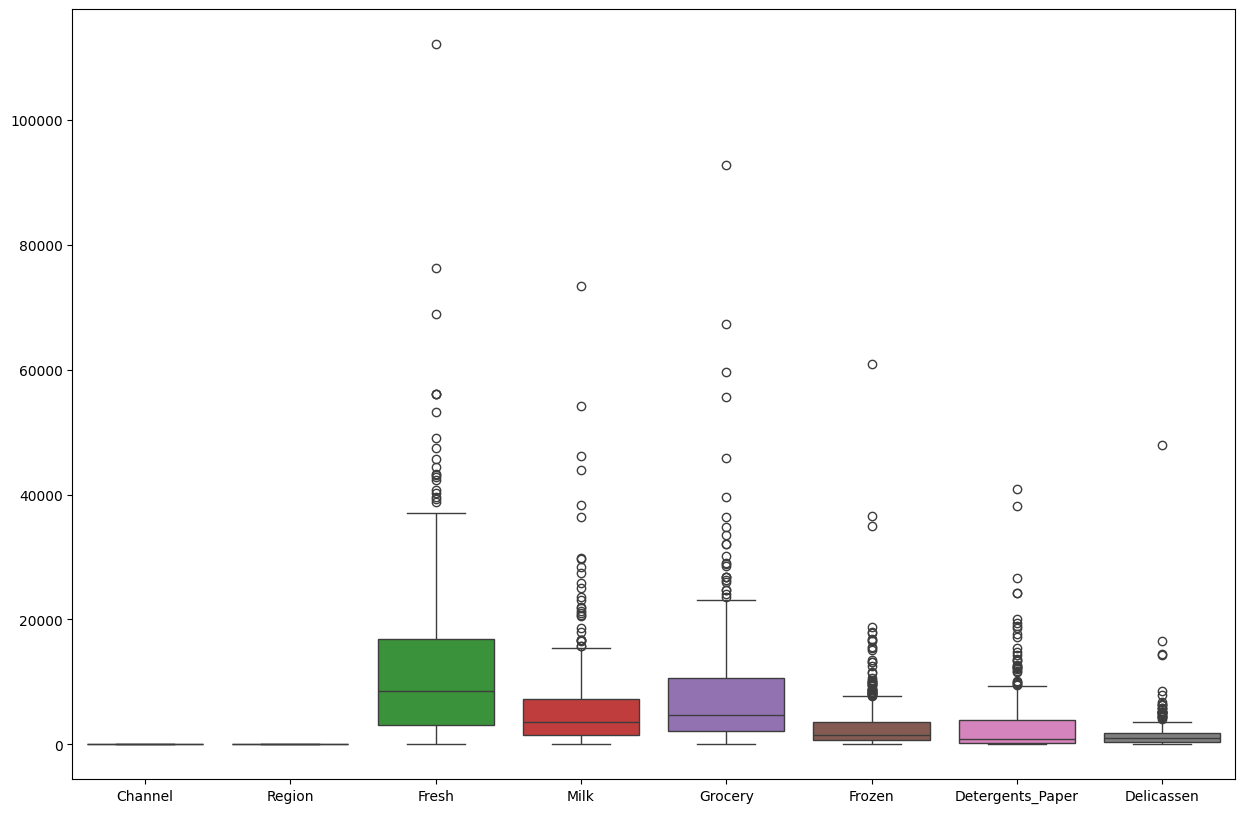

In [53]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, orient='v')
plt.show()

# 🔹 Task 2 — Feature Selection

In [54]:
features = [
    'Milk', 'Grocery'
]

X = df[features]

In [55]:
X_log = np.log1p(X)

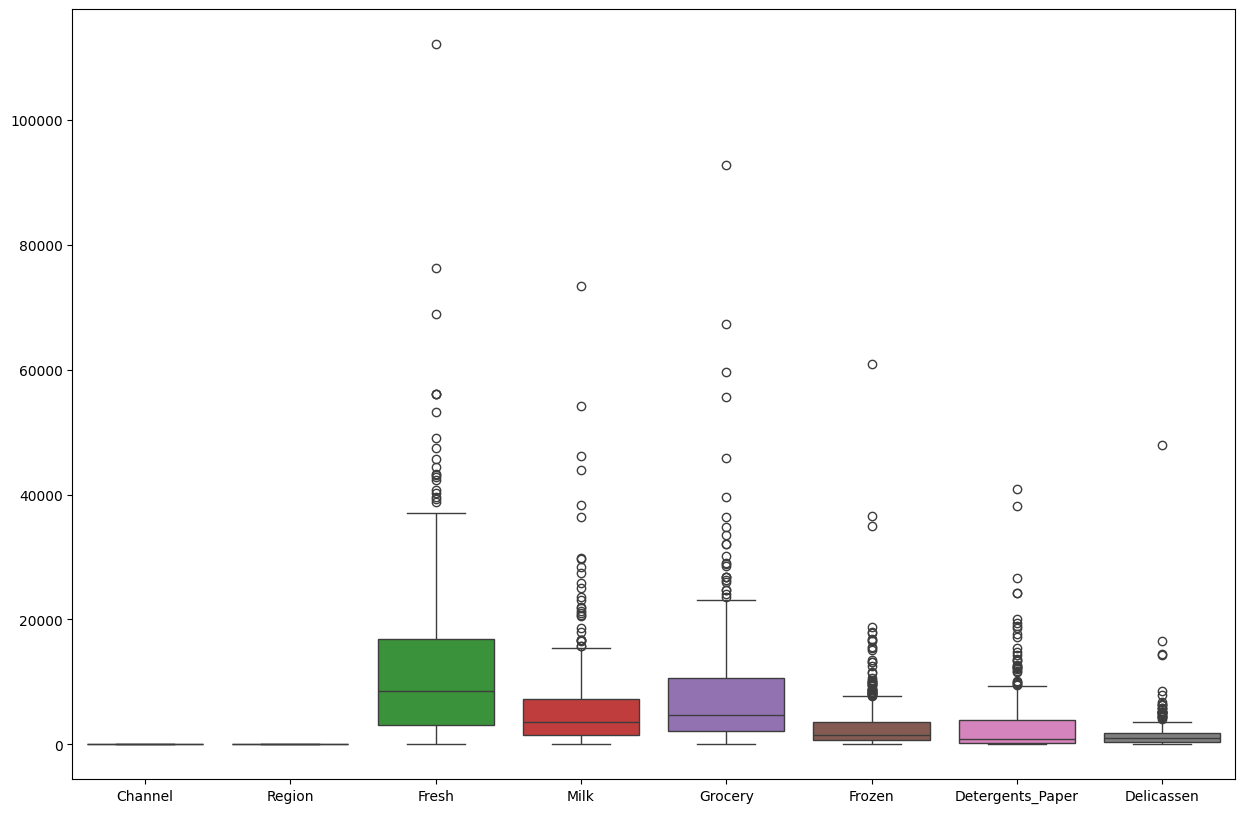

In [61]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, orient='v')
plt.show()

# 🔹 Task 3 — Data Preparation

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 🔹 Task 4 — Clustering Model Construction

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)


# 🔹 Task 5 — Optimal Cluster Identification

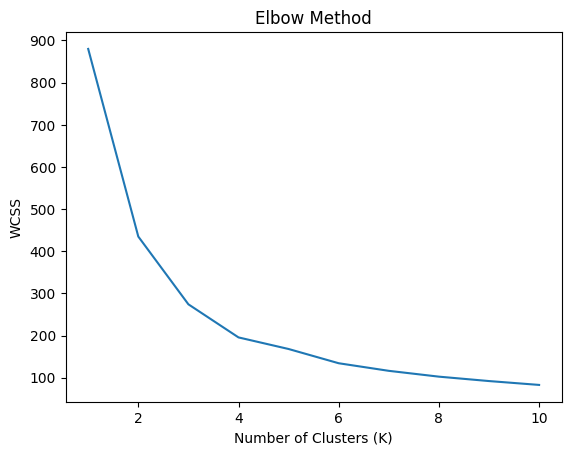

In [58]:
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


# 🔹 Task 6 — Cluster Assignment

In [59]:
kmeans = KMeans(n_clusters=4 , init='k-means++' , random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


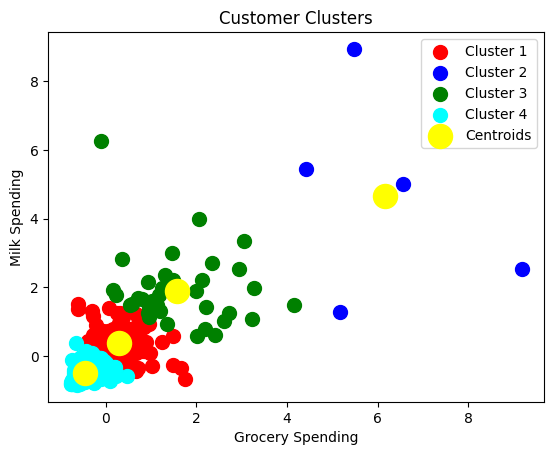

In [60]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='yellow', label='Centroids')

plt.title('Customer Clusters')
plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')
plt.legend()
plt.show()


In [67]:
features = [
    'Milk', 'Grocery'
]

In [62]:
import numpy as np

X = df[features]

# ⭐ ADD THIS (most important)
X_log = np.log1p(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)


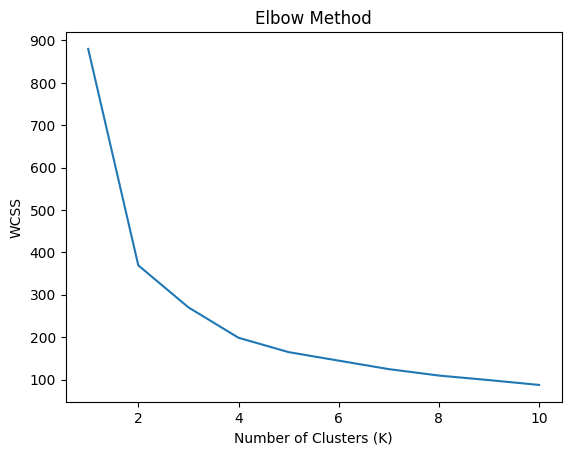

In [65]:
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
plot_features = ['Grocery', 'Milk']

X_plot = df[plot_features]
X_plot_log = np.log1p(X_plot)
X_plot_scaled = scaler.fit_transform(X_plot_log)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_plot_scaled)


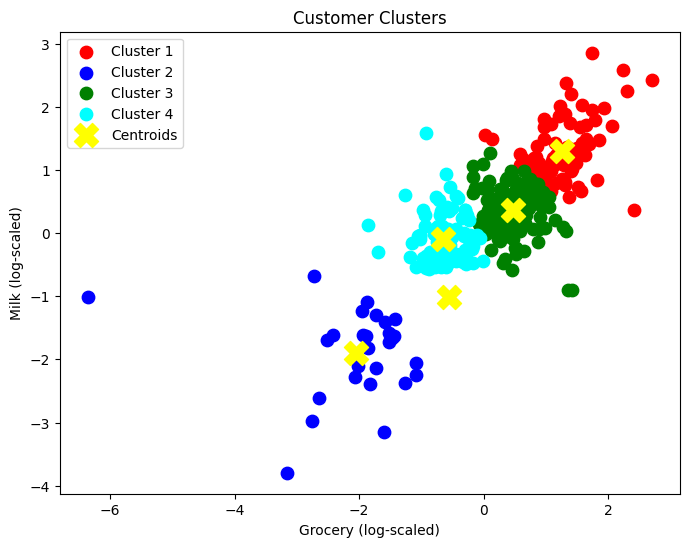

In [66]:
plt.figure(figsize=(8,6))

colors = ['red','blue','green','cyan']

for i in range(4):
    plt.scatter(
        X_plot_scaled[y_kmeans == i, 0],
        X_plot_scaled[y_kmeans == i, 1],
        s=80,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=300,
    c='yellow',
    marker='X',
    label='Centroids'
)

plt.xlabel('Grocery (log-scaled)')
plt.ylabel('Milk (log-scaled)')
plt.title('Customer Clusters')
plt.legend()
plt.show()
